In [ ]:
# Resources:
# https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

In [ ]:
! pip install yfinance

     |████████████████████████████████| 5.5MB 5.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=109dcf415ec15becf2c2162fe395fcc1ab46bce71bc651707301a5f246bd01b3
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# In-Sample (Training): 01/01/2007 - 12/31/2016
# Out-of-Sample (Testing): 01/01/2017 - 12/31/2019
start_date_train= datetime.datetime(2016, 1, 1)
end_date_train = datetime.datetime(2016, 12, 31)

In [ ]:
yf.pdr_override() 

In [ ]:
sp500 = pdr.get_data_yahoo('^GSPC', 
                           start_date_train,
                             end_date_train)
                          
print(sp500)
sp500.head()

[*********************100%***********************]  1 of 1 completed
                   Open         High  ...    Adj Close      Volume
Date                                  ...                         
2016-01-04  2038.199951  2038.199951  ...  2012.660034  4304880000
2016-01-05  2013.780029  2021.939941  ...  2016.709961  3706620000
2016-01-06  2011.709961  2011.709961  ...  1990.260010  4336660000
2016-01-07  1985.319946  1985.319946  ...  1943.089966  5076590000
2016-01-08  1945.969971  1960.400024  ...  1922.030029  4664940000
...                 ...          ...  ...          ...         ...
2016-12-23  2260.250000  2263.790039  ...  2263.790039  2020550000
2016-12-27  2266.229980  2273.820068  ...  2268.879883  1987080000
2016-12-28  2270.229980  2271.310059  ...  2249.919922  2392360000
2016-12-29  2249.500000  2254.510010  ...  2249.260010  2336370000
2016-12-30  2251.610107  2253.580078  ...  2238.830078  2670900000

[252 rows x 6 columns]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000


In [ ]:
apple = pdr.get_data_yahoo('AAPL', 
                           start_date_train,
                             end_date_train)
                          
print(apple)
apple.head()

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-01-04  25.652500  26.342501  25.500000  26.337500  24.443037  270597600
2016-01-05  26.437500  26.462500  25.602501  25.677500  23.830513  223164000
2016-01-06  25.139999  25.592501  24.967501  25.174999  23.364161  273829600
2016-01-07  24.670000  25.032499  24.107500  24.112499  22.378082  324377600
2016-01-08  24.637501  24.777500  24.190001  24.240000  22.496408  283192000
...               ...        ...        ...        ...        ...        ...
2016-12-23  28.897499  29.129999  28.897499  29.129999  27.636169   56998000
2016-12-27  29.129999  29.450001  29.122499  29.315001  27.811686   73187600
2016-12-28  29.379999  29.504999  29.049999  29.190001  27.693100   83623600
2016-12-29  29.112499  29.277500  29.100000  29.182501  27.685980   60158000
2016-12

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.443037,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.830513,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.364161,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.378082,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.496408,283192000


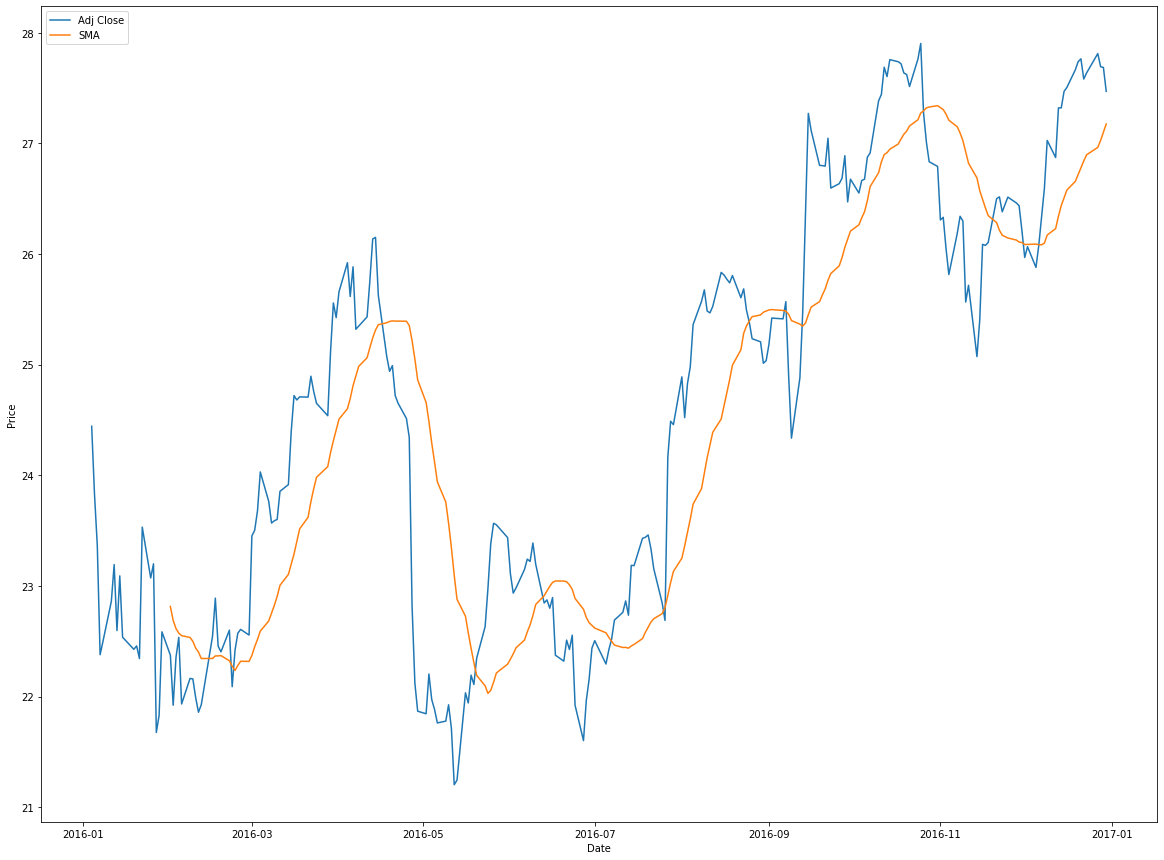

In [ ]:
plt.figure(figsize = (20,15))
apple_1 = pd.DataFrame(apple['Adj Close'])
apple_1['SMA'] = apple_1['Adj Close'].rolling(20).mean()
plt.plot(apple_1.index,apple_1['Adj Close'], label = 'Adj Close' )
plt.plot(apple_1.index, apple_1['SMA'], label = 'SMA')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()

In [ ]:
apple_1[20:25]

,Adj Close,SMA
Date,,
2016-02-02,21.921011,22.687942
2016-02-03,22.354887,22.614161
2016-02-04,22.534504,22.572678
2016-02-05,21.932650,22.550407
2016-02-08,22.163597,22.533766


In [ ]:
standard_dev = apple_1['Adj Close'].std() 
apple_1['BBUpper'] = apple_1['Adj Close'].rolling(20).mean() + apple_1['Adj Close'].rolling(20).std() * 2
apple_1['BBLower'] = apple_1['Adj Close'].rolling(20).mean() - apple_1['Adj Close'].rolling(20).std() * 2

In [ ]:
apple_1[20:25]

,Adj Close,SMA,BBUpper,BBLower
Date,,,,
2016-02-02,21.921011,22.687942,23.829740,21.546145
2016-02-03,22.354887,22.614161,23.628704,21.599618
2016-02-04,22.534504,22.572678,23.523976,21.621381
2016-02-05,21.932650,22.550407,23.540935,21.559879
2016-02-08,22.163597,22.533766,23.539184,21.528348


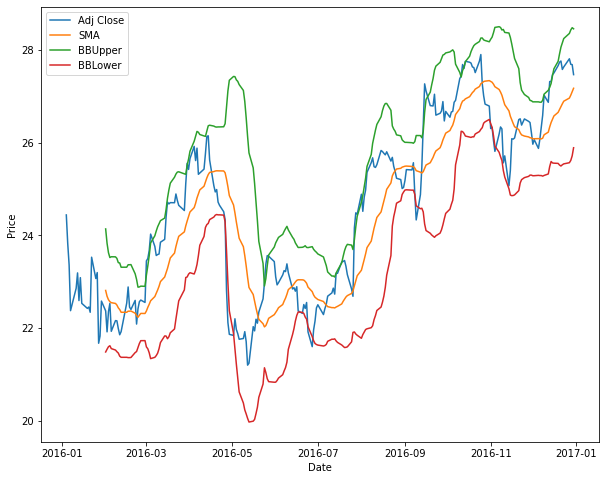

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(apple_1.index,apple_1.iloc[:,0], label = 'Adj Close' )
plt.plot(apple_1.index, apple_1.iloc[:,1], label = 'SMA')
plt.plot(apple_1.index, apple_1.iloc[:,-2], label = 'BBUpper' )
plt.plot(apple_1.index, apple_1.iloc[:,-1], label = 'BBLower')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.show()

In [ ]:
apple_1 = apple_1.iloc[20:, :]
apple_1['Ratio'] = apple_1['Adj Close']/apple_1['SMA']
apple_1['BB_width'] = apple_1['BBUpper'] - apple_1['BBLower']
apple_1.head()

,Adj Close,SMA,BBUpper,BBLower,Ratio,BB_width
Date,,,,,,
2016-03-02,23.502602,22.450291,23.345354,21.555228,1.046873,1.790125
2016-03-03,23.677561,22.516425,23.564231,21.468618,1.051568,2.095613
2016-03-04,24.029806,22.591190,23.838774,21.343605,1.063680,2.495169
2016-03-07,23.763876,22.682751,23.994003,21.371499,1.047663,2.622504
2016-03-08,23.567921,22.752967,24.097153,21.408782,1.035817,2.688371


In [ ]:
apple_1['Adj Close'] = apple_1['Adj Close']/apple_1.iloc[0 , : ].loc['Adj Close']
apple_1['Ratio'] = apple_1['Ratio']/apple_1.iloc[0 , : ].loc['Ratio']
apple_1['BB_width'] = apple_1['BB_width']/apple_1.iloc[0 , : ].loc['BB_width']
apple_1.head()

,Adj Close,SMA,BBUpper,BBLower,Ratio,BB_width
Date,,,,,,
2016-03-02,1.000000,22.450291,23.345354,21.555228,1.000000,1.000000
2016-03-03,1.007444,22.516425,23.564231,21.468618,1.004485,1.170652
2016-03-04,1.022432,22.591190,23.838774,21.343605,1.016055,1.393851
2016-03-07,1.011117,22.682751,23.994003,21.371499,1.000755,1.464984
2016-03-08,1.002779,22.752967,24.097153,21.408782,0.989440,1.501778


In [ ]:
apple_2 = apple_1.copy()
apple_2 = apple_2.drop(columns = ['SMA', 'BBUpper', 'BBLower'] )
apple_2['Adj Close'] = pd.qcut(apple_1['Adj Close'],q=[0, .2, .4, .6, .8, 1], labels = [1,2,3,4,5])
apple_2['Ratio'] = pd.qcut(apple_1['Ratio'],q=[0, .2, .4, .6, .8, 1], labels = [1,2,3,4,5])
apple_2['BB_width'] = pd.qcut(apple_1['BB_width'],q=[0, .2, .4, .6, .8, 1], labels = [1,2,3,4,5])
apple_2.head()

,Adj Close,Ratio,BB_width
Date,,,
2016-03-02,2,5,2
2016-03-03,2,5,3
2016-03-04,2,5,3
2016-03-07,2,5,3
2016-03-08,2,4,3


In [ ]:
apple_2['state'] = [int(str(apple_2.iloc[i,0]) + str(apple_2.iloc[i,1]) + str(apple_2.iloc[i,2])) for i in range(len(apple_2))]

In [ ]:
apple_2.head()

,Adj Close,Ratio,BB_width,state
Date,,,,
2016-03-02,2,5,2,252
2016-03-03,2,5,3,253
2016-03-04,2,5,3,253
2016-03-07,2,5,3,253
2016-03-08,2,4,3,243


In [ ]:
all_states = apple_2.state.unique().tolist()
all_actions = {0:'hold', 1:'buy',2:'sell'}